In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("hospital_readmissions.csv")

# View data
df.head()
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [2]:
# Missing values
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

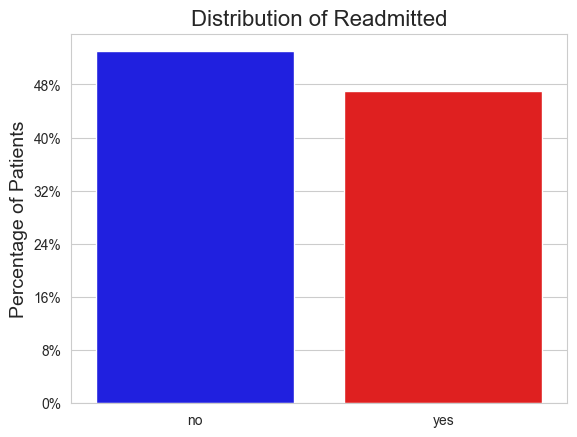

In [3]:
from matplotlib.ticker import FuncFormatter

# Define colors for each "readmitted" value
colors = {'no': 'blue', 'yes': 'red'}

# Create a countplot to visualize the distribution of the target variable
sns.set_style('whitegrid')
sns.countplot(x='readmitted', data=df, palette=colors)

# Set the title and axis labels
plt.title('Distribution of Readmitted', fontsize=16)
plt.xlabel('')
plt.ylabel('Percentage of Patients', fontsize=14)

# Format y-axis labels as percentages
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y/len(df)))
plt.gca().yaxis.set_major_formatter(formatter)

# Remove x-axis ticks and labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# Show the plot
plt.show()


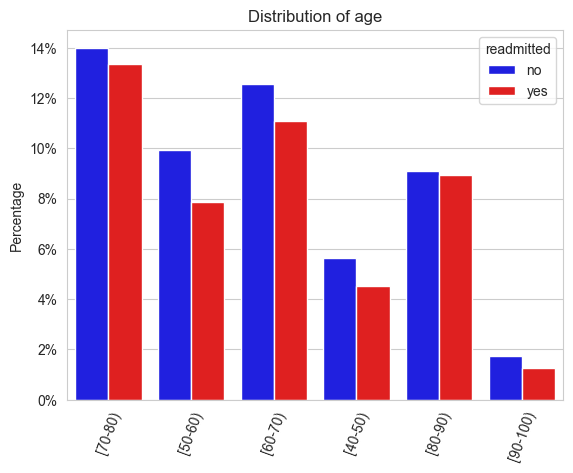

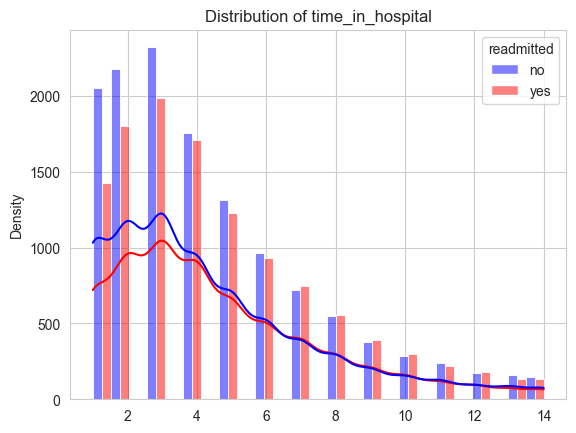

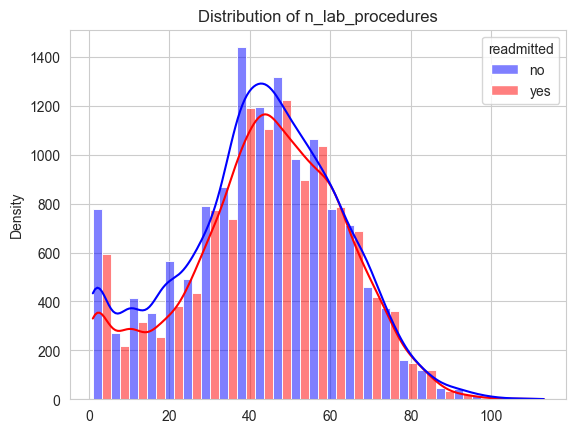

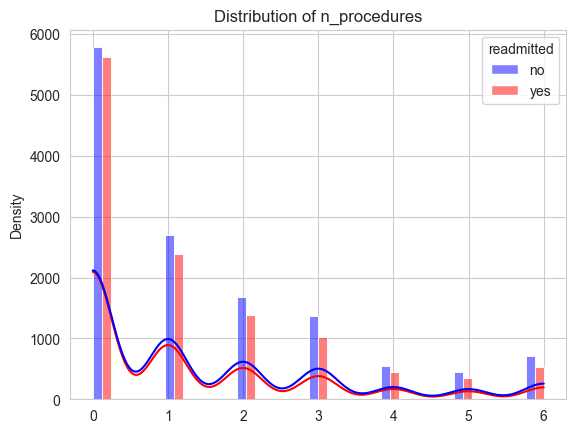

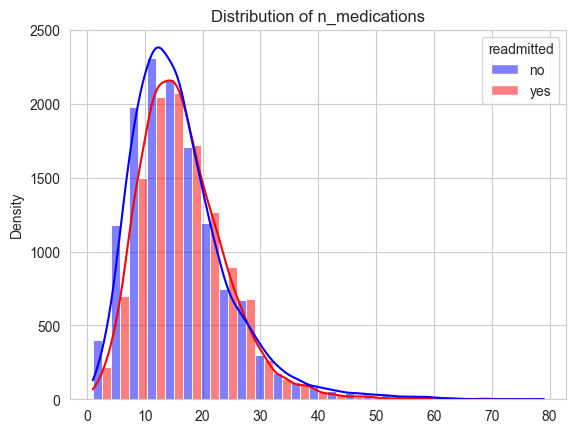

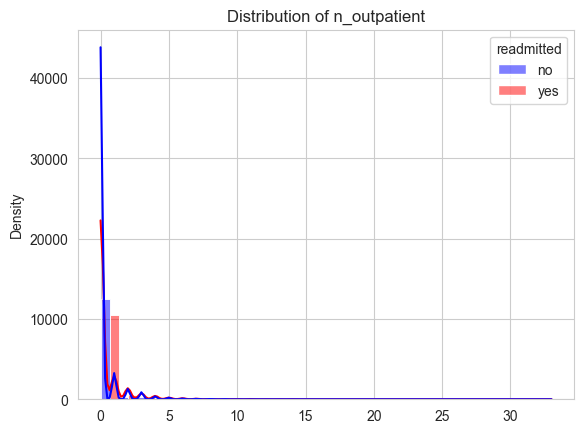

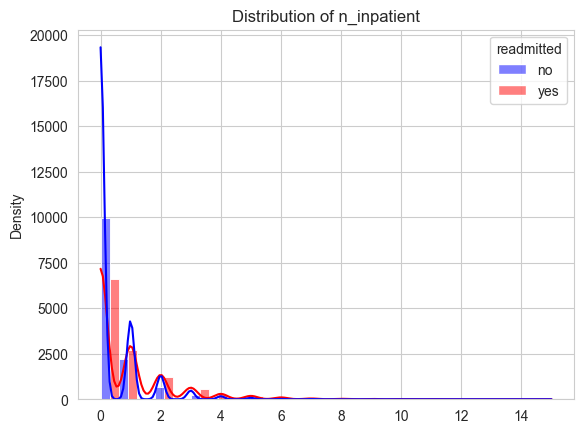

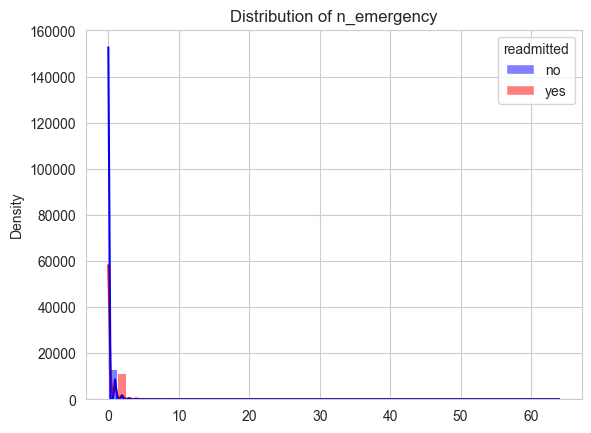

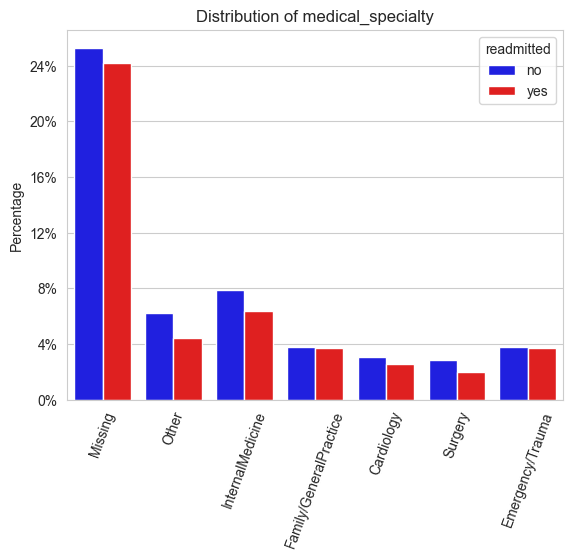

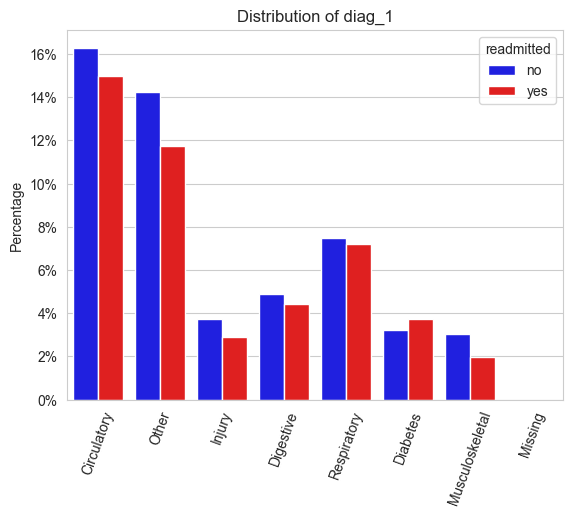

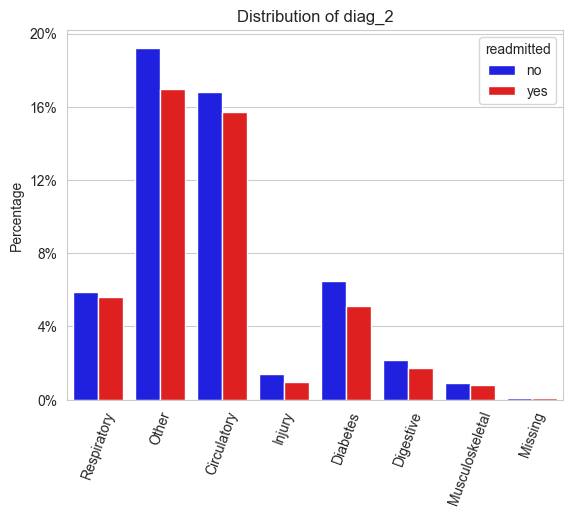

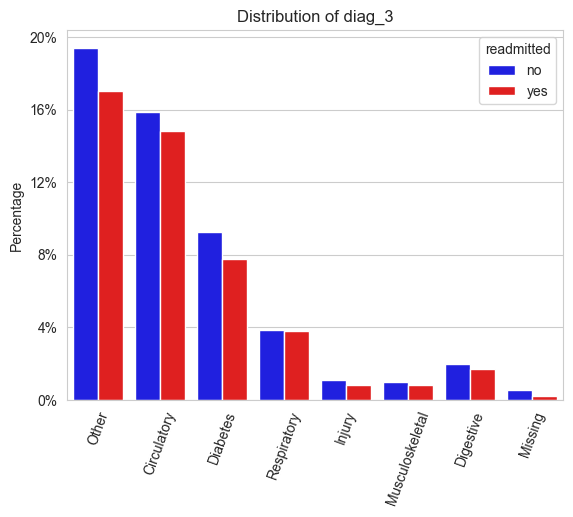

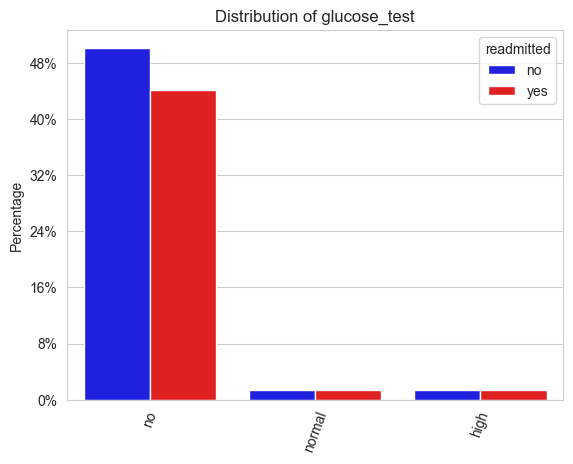

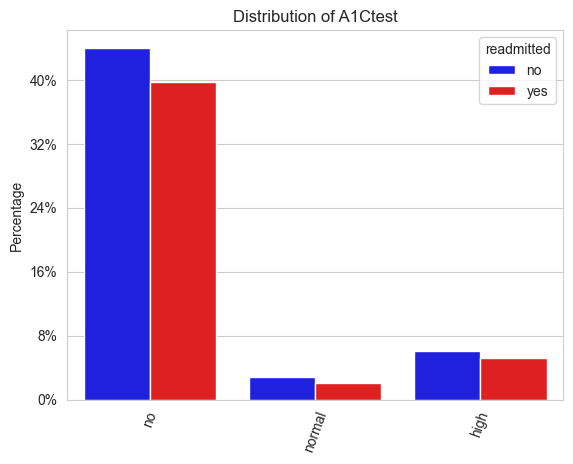

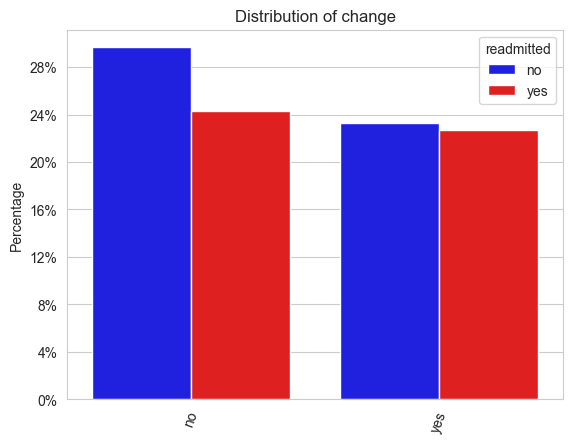

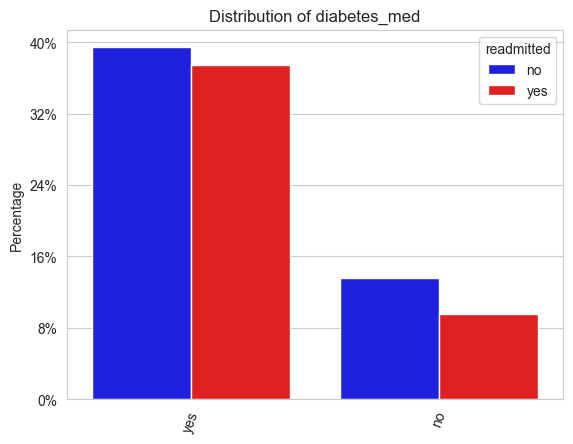

In [4]:
# create a list of column names
cols = list(df.columns)
cols.remove('readmitted')

# loop through each column and create a plot
for col in cols:
    if df[col].dtype == 'int64':
        # if the column is numeric, create a histogram and density plot
       # fig, ax = plt.subplots(figsize=(10, 6))  # set figure size here
        sns.histplot(data=df, x=col, hue='readmitted', multiple="dodge", kde=True, bins=25, palette={'no':'blue', 'yes':'red'})
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.xlabel(None)
    else:
        # if the column is categorical, create a countplot with hue
     #   fig, ax = plt.subplots(figsize=(3, 7))  # set figure size here
        ax = sns.countplot(x=col, data=df, hue='readmitted', palette={'no':'blue', 'yes':'red'})
        # rotate x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
        
        # set the title and axis labels
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Percentage')
        
        # set y-axis label as percentage
        ax.yaxis.set_major_formatter(lambda y, _: '{:.0%}'.format(y/len(df)))
        
        # remove x-axis label
        ax.set(xlabel=None)
        
    # show the plot
    plt.show()

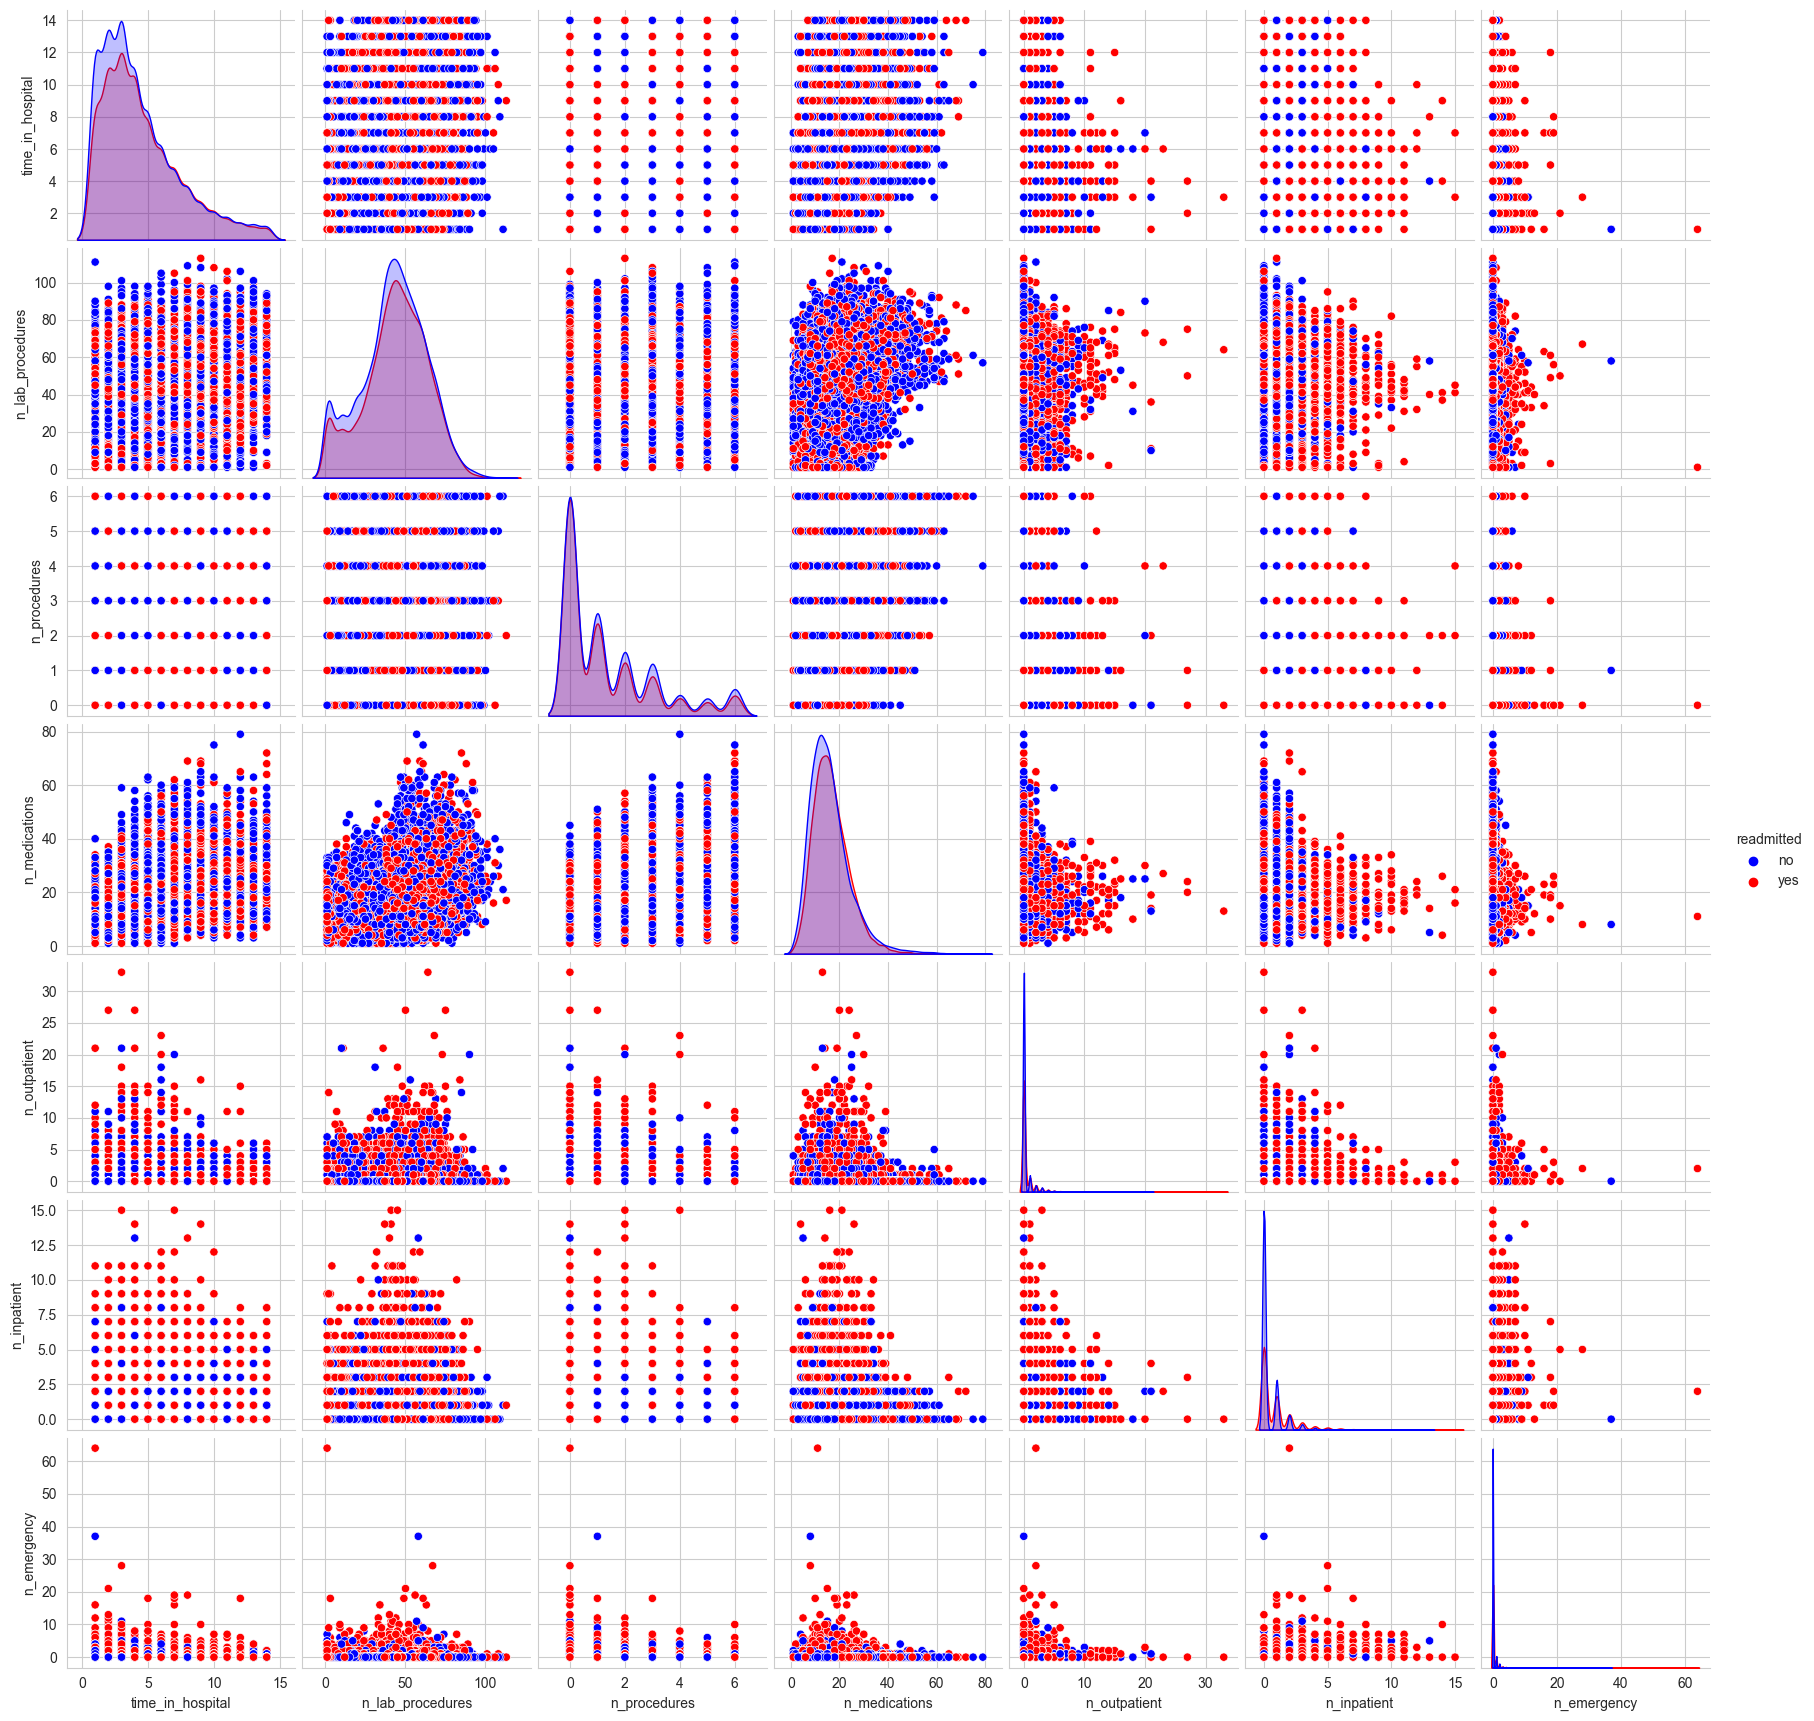

In [5]:
# create pairplot
sns.pairplot(data=df, diag_kind='kde', hue='readmitted', palette={'no':'blue', 'yes':'red'})

# show the plot
plt.show()

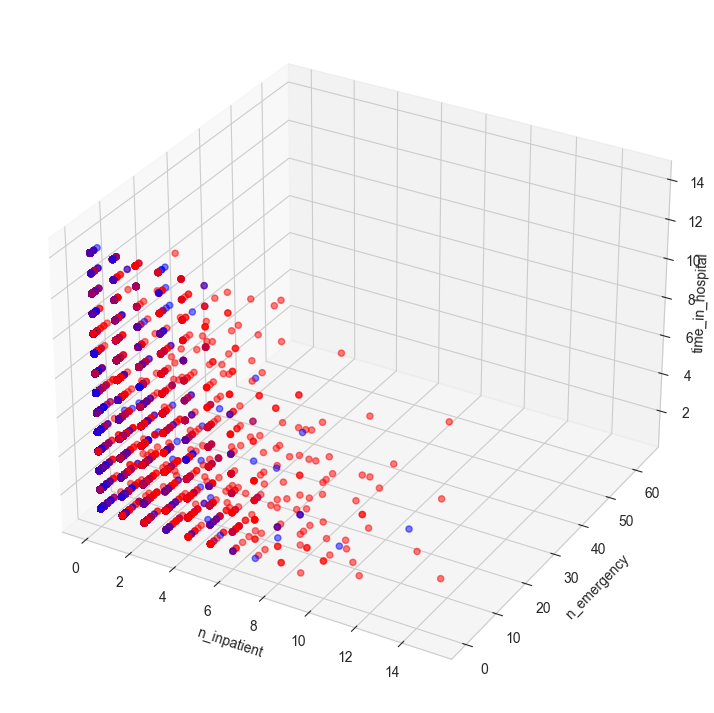

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
#fig, ax = plt.subplots(figsize=(1, 23), subplot_kw={"projection": "3d"})

x = df['n_inpatient']
y = df['n_emergency']
z = df['time_in_hospital']
colors = {'no': 'blue', 'yes': 'red'}
ax.scatter(x, y, z, c=df['readmitted'].apply(lambda x: colors[x]), alpha=0.5)
ax.set_xlabel('n_inpatient')
ax.set_ylabel('n_emergency')
ax.set_zlabel('time_in_hospital', labelpad=-5)

plt.show()

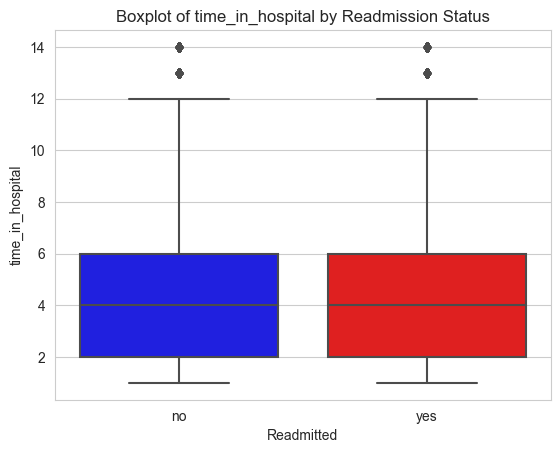

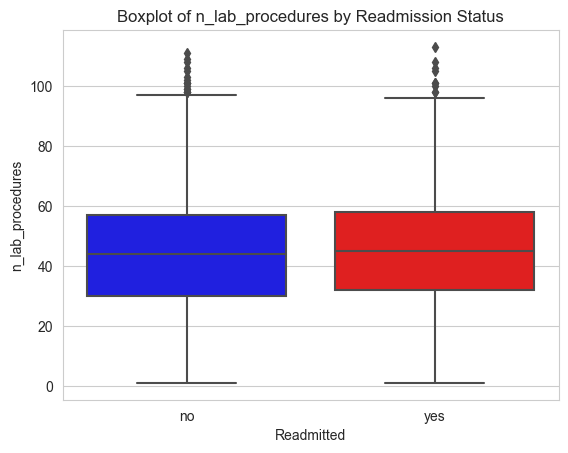

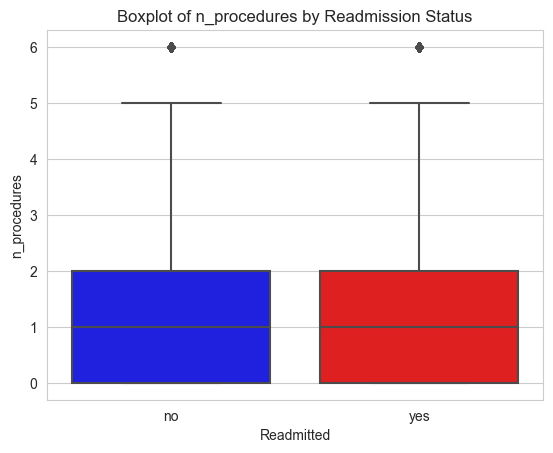

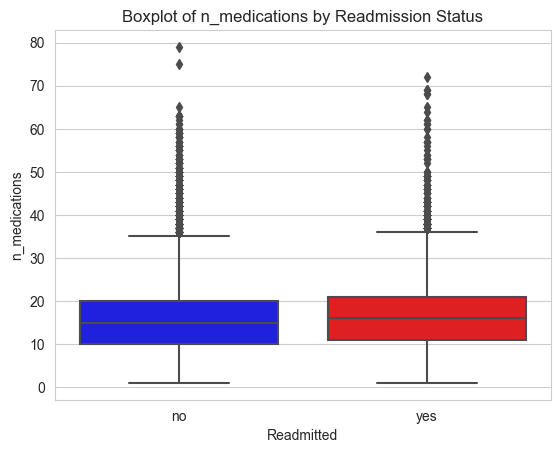

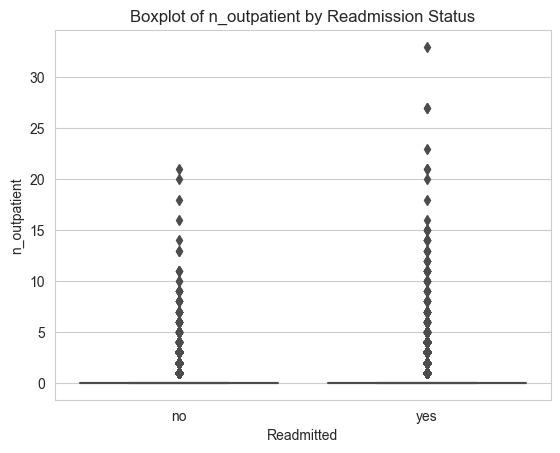

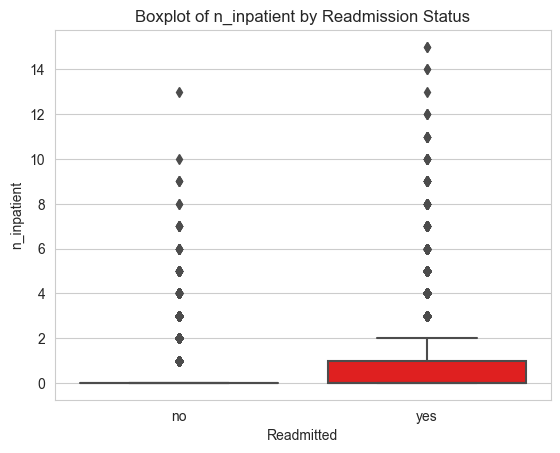

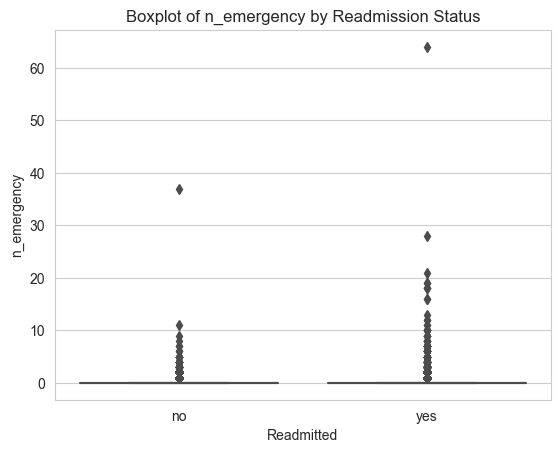

In [7]:
# select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# create boxplots for each numeric variable, grouped by readmitted
for col in num_cols:
    ax = sns.boxplot(x='readmitted', y=col, data=df, palette={'no':'blue', 'yes':'red'})
    ax.set(title=f'Boxplot of {col} by Readmission Status', xlabel='Readmitted', ylabel=col)
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

# define target variable and features
target = 'readmitted'
# recode positive label to 1
df[target] = df[target].apply(lambda x: 1 if x == 'yes' else 0)

features = [col for col in df.columns if col != target]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# define numeric and categorical transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', cat_transformer, X_train.select_dtypes(include=['object']).columns)
    ])

# create pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# perform cross-validation on training set
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')

# print mean and standard deviation of cross-validation scores
print(f'Cross-validation ROC AUC: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}')

# fit pipeline on training set
clf.fit(X_train, y_train)

# predict on training set
y_train_pred = clf.predict(X_train)

# predict on test set
y_test_pred = clf.predict(X_test)

# calculate and print training set performance metrics
print(f'Training set ROC AUC: {roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]):.3f}')
print(f'Training set F1-score: {f1_score(y_train, y_train_pred):.3f}')
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred):.3f}')

# calculate and print test set performance metrics
print(f'Test set ROC AUC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]):.3f}')
print(f'Test set F1-score: {f1_score(y_test, y_test_pred):.3f}')
print(f'Test set accuracy: {accuracy_score(y_test, y_test_pred):.3f}')


Cross-validation ROC AUC: 0.657 +/- 0.004
Training set ROC AUC: 0.681
Training set F1-score: 0.553
Training set accuracy: 0.629
Test set ROC AUC: 0.657
Test set F1-score: 0.537
Test set accuracy: 0.617


In [9]:
from sklearn.model_selection import GridSearchCV

# define parameter grid for XGBoost
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
}

# perform grid search with F1 score as the metric to optimize
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='f1', cv=5)

# fit pipeline on training set with grid search
grid_search.fit(X_train, y_train)

# print best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best F1 score: {grid_search.best_score_:.3f}')

# predict on training set with best estimator from grid search
y_train_pred = grid_search.best_estimator_.predict(X_train)

# predict on test set with best estimator from grid search
y_test_pred = grid_search.best_estimator_.predict(X_test)

# calculate and print training set performance metrics
print(f'Training set ROC AUC: {roc_auc_score(y_train, grid_search.best_estimator_.predict_proba(X_train)[:, 1]):.3f}')
print(f'Training set F1-score: {f1_score(y_train, y_train_pred):.3f}')
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred):.3f}')

# calculate and
# calculate and print test set performance metrics
print(f'Test set ROC AUC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]):.3f}')
print(f'Test set F1-score: {f1_score(y_test, y_test_pred):.3f}')
print(f'Test set accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

Best parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.6}
Best F1 score: 0.559
Training set ROC AUC: 0.758
Training set F1-score: 0.639
Training set accuracy: 0.686
Test set ROC AUC: 0.657
Test set F1-score: 0.549
Test set accuracy: 0.610
